In [1]:
import os
os.chdir('../../scripts')
from analysis_tools_cython import *

In [58]:
lc, lc_info = import_lightcurve('/storage/astro2/phrdhx/eleanor-lite-project-v2/s0004/hlsp_gsfc-eleanor-lite_tess_ffi_s0004-0000000425083268_tess_v1.0_lc.fits')

In [59]:
lc = lc.to_pandas()

In [60]:
lc['abs_devs'] = (np.abs((lc['FLUX_BKG']) - np.nanmedian(lc['FLUX_BKG'])))

In [61]:
mad = np.nanmedian(lc.abs_devs)

In [62]:
test = lc[lc.abs_devs < 3 * mad] 

In [63]:
3 * mad

6.0697174072265625

Text(0.5, 1.0, 'FLUX_BKG')

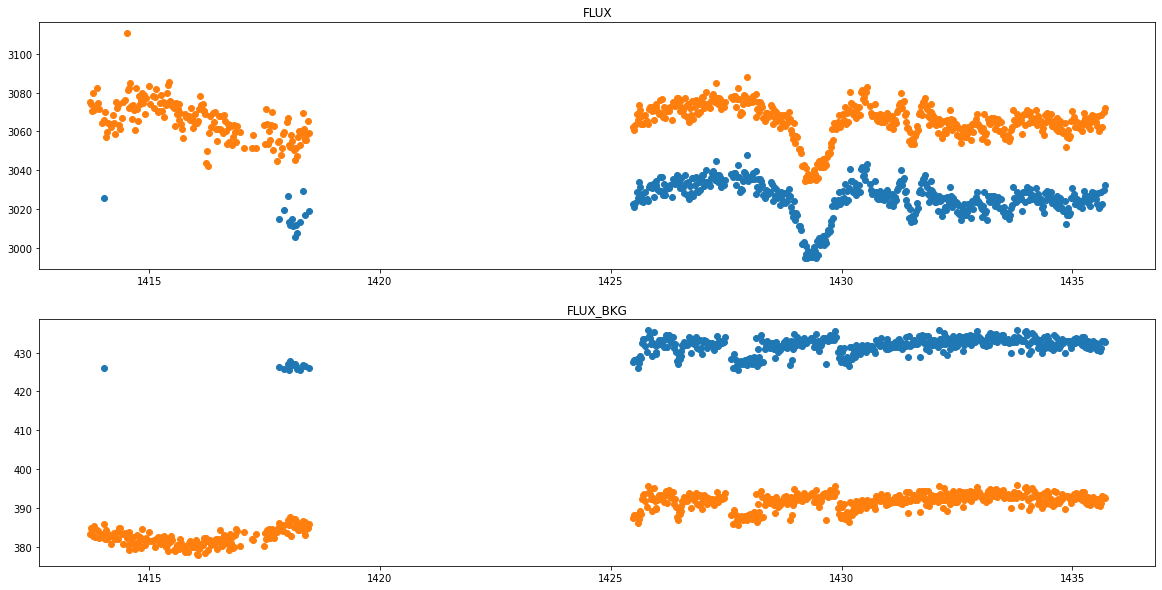

In [64]:
fig, ax = plt.subplots(2,1, figsize=(20,10))

ax[0].scatter(test['TIME'],test['PCA_FLUX'] - 40,zorder=3)
ax[0].set_title('FLUX')
ax[1].scatter(test['TIME'], test['FLUX_BKG'])
ax[1].set_title('FLUX_BKG')
#ax[1].axhline(mad,label = "mad",color='black',linewidth=5)
#ax[1].axhline(3*mad,label="3 x mad",color='red',linewidth=5)
ax[0].scatter(lc['TIME'],lc['PCA_FLUX'])
ax[0].set_title('FLUX')
ax[1].scatter(lc['TIME'], lc['FLUX_BKG'] - 40)
ax[1].set_title('FLUX_BKG')

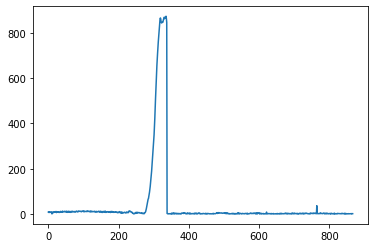

In [53]:
plt.plot(lc.abs_devs)

In [8]:
lc2, lc_info2 = import_lightcurve('/storage/astro2/phrdhx/eleanor-lite-project-v2/s0006/hlsp_gsfc-eleanor-lite_tess_ffi_s0006-0000000049014120_tess_v1.0_lc.fits')

In [9]:
norm2 = lc2['FLUX_ERR']/np.median(lc2['FLUX_ERR']) - np.ones(len(lc2))

In [10]:
mad2 = np.nanmedian(np.abs(norm2) - np.nanmedian(norm2))

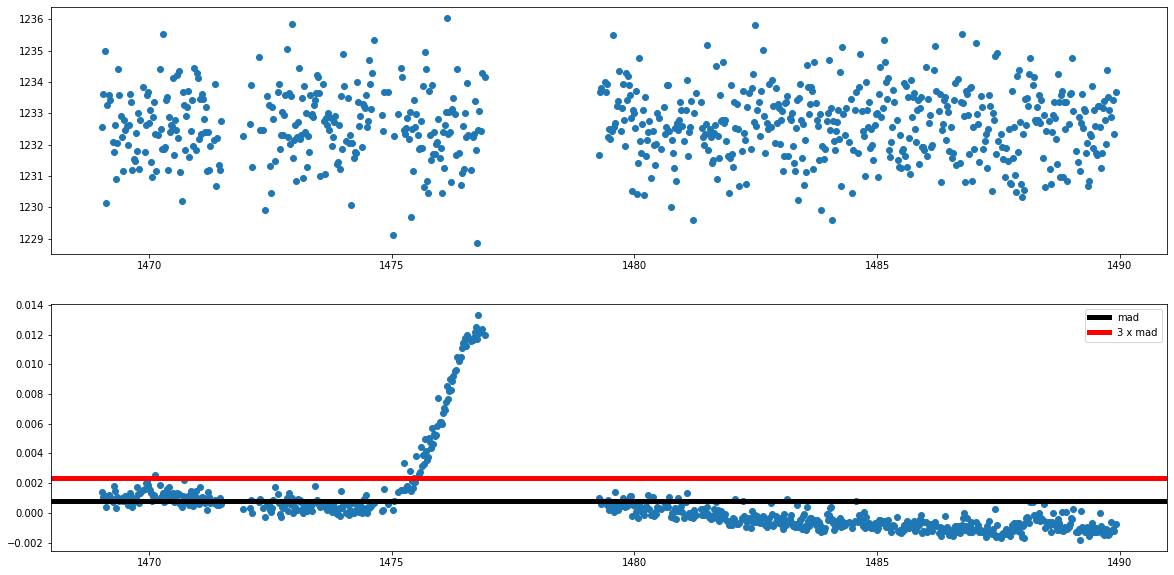

In [21]:
fig, ax = plt.subplots(2,1, figsize=(20,10))

ax[0].scatter(lc2['TIME'],lc2['PCA_FLUX'])
ax[1].scatter(lc2['TIME'], norm2)
ax[1].axhline(mad2,label = "mad",color='black',linewidth=5)
ax[1].axhline(3*mad2,label="3 x mad",color='red',linewidth=5)

plt.legend()

---

In [66]:
lc

,TIME,CORR_FLUX,QUALITY,FLUX_ERR,FLUX_BKG,X_CENTROID,Y_CENTROID,PCA_FLUX,abs_devs
0,1413.719474,3066.019531,0,1.674234,423.297913,94.197205,42.829147,3075.397461,8.182861
1,1413.740307,3064.949463,0,1.674266,424.992859,94.197647,42.848804,3074.011475,6.487915
2,1413.761140,3062.712402,0,1.674158,424.053711,94.186859,42.837521,3070.623779,7.427063
3,1413.781973,3063.240723,0,1.674770,422.819305,94.196861,42.828617,3080.071289,8.661469
4,1413.802807,3063.768799,0,1.674228,425.291595,94.196915,42.828716,3070.882812,6.189178
...,...,...,...,...,...,...,...,...,...
633,1435.594364,3065.079102,0,1.641554,430.450439,94.195648,42.827206,3061.562744,1.030334
634,1435.615197,3066.562500,0,1.642448,431.194489,94.195572,42.827095,3068.561523,0.286285
635,1435.636030,3065.571289,0,1.641807,433.018188,94.195999,42.826973,3062.544189,1.537415
636,1435.677697,3063.711182,0,1.641309,432.844849,94.195686,42.827248,3069.898193,1.364075


In [69]:
lc.iloc[:,4]

0      423.297913
1      424.992859
2      424.053711
3      422.819305
4      425.291595
          ...    
633    430.450439
634    431.194489
635    433.018188
636    432.844849
637    432.662506
Name: FLUX_BKG, Length: 638, dtype: float32

---

In [1]:
import os
os.chdir('../../scripts')
from analysis_tools_cython import *
from post_processing import *

In [3]:
data = get_output('../eleanor-lite-combined-v2.txt')

                                                          0
0         /tmp/eleanor-lite/s0003/hlsp_gsfc-eleanor-lite...
1         /tmp/eleanor-lite/s0003/hlsp_gsfc-eleanor-lite...
2         /tmp/eleanor-lite/s0003/hlsp_gsfc-eleanor-lite...
3         /tmp/eleanor-lite/s0003/hlsp_gsfc-eleanor-lite...
4         /tmp/eleanor-lite/s0003/hlsp_gsfc-eleanor-lite...
...                                                     ...
13205907  /tmp/eleanor-lite/s0007/hlsp_gsfc-eleanor-lite...
13205908  /tmp/eleanor-lite/s0007/hlsp_gsfc-eleanor-lite...
13205909  /tmp/eleanor-lite/s0007/hlsp_gsfc-eleanor-lite...
13205910  /tmp/eleanor-lite/s0007/hlsp_gsfc-eleanor-lite...
13205911  /tmp/eleanor-lite/s0007/hlsp_gsfc-eleanor-lite...

[13205912 rows x 1 columns]


ValueError: Length mismatch: Expected axis has 1 elements, new values have 25 elements